# In this notebook I will perform data wrangling on a car dataset, and then creating two functions for running and plotting linear regressions. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/auto.csv"

df = pd.read_csv(file_path)
df.head()

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


In [2]:
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

df.columns = headers

df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


### **Replace "?" with "NaN" so that we can more easily replace empty values in our dataset:**

In [3]:
df.replace("?",np.nan, inplace = True)

missing_data = df.isnull()
missing_data.sum()

symboling             0
normalized-losses    40
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

## **Here is an easy function to help replace NaN values in the data:**

In [4]:
def replace_NaN(data, columns, method,*,predictor=True, predictor_name=None):
    import numpy as np
    if method=="mean":
        for column in columns:
            column_mean = data[column].astype('float').mean(axis=0)
            data[column].replace(np.nan,column_mean, inplace = True)
    if method=="common":
        for column in columns:
            most_common = data[column].value_counts().idxmax()
            data[column].replace(np.nan, most_common, inplace=True)
    if predictor:
        data.dropna(subset = [predictor_name],axis=0, inplace = True)
        data.reset_index(drop=True,inplace=True)

columns = ['normalized-losses', 'bore', 'stroke', 'horsepower', 'peak-rpm']
replace_NaN(data=df, method="mean", predictor_name="price", columns=columns)

columns = ['num-of-doors']
replace_NaN(data=df, columns=columns, method="common", predictor=False)

df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,122.0,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


In [5]:
missing_data = df.isnull()
missing_data.sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

#### Function worked and there are no longer and null values in the data!

In [6]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [7]:
#change the data types of certain numeric variables
df[['bore','stroke','price', 'peak-rpm']] = df[['bore','stroke','price', 'peak-rpm']].astype('float')
df[['normalized-losses']] = df[['normalized-losses']].astype('int')

df.dtypes

symboling              int64
normalized-losses      int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower            object
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

In [8]:
#convert units of highway mpg and then rename it
df['highway-mpg'] = 235/df['highway-mpg']
df.rename(columns = {'highway-mpg':'highway-L/100km'}, inplace = True)

columns = ['length','width','height']

#quick function to use the min_max method to normalize some of the data

def min_max(data, columns, new_column=False):
    
    """
    Make sure to make a list of columns, and potentially new names for them if you want.
    """
    for column in columns:
        if new_column:
            for name in new_names:
                  data[name] = data[column]/data[column].max()
        else:
            data[column] = data[column]/data[column].max()

min_max(data=df, columns = columns)

df[['length','width','height']].head()

,length,width,height
0,0.811148,0.890278,0.816054
1,0.822681,0.909722,0.876254
2,0.848630,0.919444,0.908027
3,0.848630,0.922222,0.908027
4,0.851994,0.920833,0.887960


## Simple Binning:

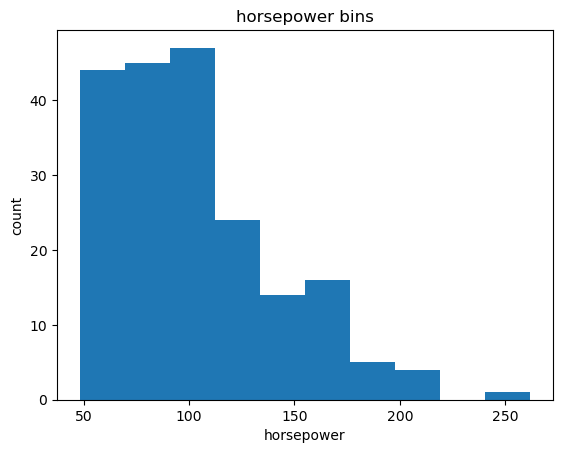

In [9]:
df['horsepower'] = df['horsepower'].astype(int, copy=True)

%matplotlib inline
import matplotlib.pyplot as plt
plt.hist(df['horsepower'])

plt.xlabel("horsepower")
plt.ylabel("count")
plt.title("horsepower bins")

plt.show()

In [10]:
bins = np.linspace(min(df['horsepower']),max(df['horsepower']),4)
group_names = ['low','medium','high']

df['horsepower-binned'] = pd.cut(df['horsepower'], bins, labels=group_names, include_lowest = True)
df[['horsepower','horsepower-binned']].head()

,horsepower,horsepower-binned
0,111,low
1,154,medium
2,102,low
3,115,low
4,110,low


In [11]:
df['horsepower-binned'].value_counts()

horsepower-binned
low       152
medium     43
high        5
Name: count, dtype: int64

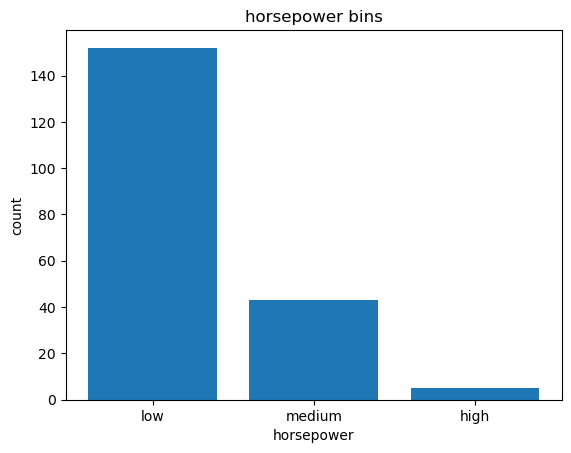

In [12]:
plt.bar(group_names,df['horsepower-binned'].value_counts())

plt.xlabel("horsepower")
plt.ylabel("count")
plt.title("horsepower bins")

plt.show()

## Creating dummy variables:

In [13]:
dummy_var1 = pd.get_dummies(df["fuel-type"])
dummy_var1.rename(columns = {'gas':'fuel-type-gas', 'diesel' :'fuel-type-diesel'}, inplace = True)
df = pd.concat([df,dummy_var1],axis=1)
df.drop("fuel-type",axis=1,inplace=True)

dummy_var2 = pd.get_dummies(df['aspiration'])
dummy_var2.rename(columns = {'std':'aspiration-std', 'turbo': 'aspiration-turbo'}, inplace = True)
df = pd.concat([df,dummy_var2],axis=1)
df.drop("aspiration",axis=1,inplace=True)

bool_columns = df.select_dtypes(include=bool).columns
df[bool_columns] = df[bool_columns].astype(int)

df.head()

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,horsepower,peak-rpm,city-mpg,highway-L/100km,price,horsepower-binned,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,111,5000.0,21,8.703704,16500.0,low,0,1,1,0
1,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.909722,...,154,5000.0,19,9.038462,16500.0,medium,0,1,1,0
2,2,164,audi,four,sedan,fwd,front,99.8,0.848630,0.919444,...,102,5500.0,24,7.833333,13950.0,low,0,1,1,0
3,2,164,audi,four,sedan,4wd,front,99.4,0.848630,0.922222,...,115,5500.0,18,10.681818,17450.0,low,0,1,1,0
4,2,122,audi,two,sedan,fwd,front,99.8,0.851994,0.920833,...,110,5500.0,19,9.400000,15250.0,low,0,1,1,0


# Two functions for running regression:

In [24]:
def univariate_regression(data, independent_var, dependent_var, dist=True,test_size=0.15):
    import statsmodels.api as sm
    from sklearn.tree import DecisionTreeClassifier 
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import accuracy_score
    from scipy import stats
    import seaborn as sns
    import matplotlib.pyplot as plt
    
    pearson_coef, p_value = stats.pearsonr(data[independent_var],df[dependent_var])
    print("\n", f"\033[1mThe correlation between {independent_var} and {dependent_var} is {round(pearson_coef,5)} and the P-value is {round(p_value,5)}\033[0m", "\n")
    
    sns.regplot(x = 'city-mpg', y = 'price', data = df)
    X = data[independent_var].values.reshape(-1,1)
    y = data[dependent_var]
        
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size)
        
    X_train_sm = sm.add_constant(X_train)

    model_sm = sm.OLS(y_train, X_train_sm).fit()

    print(model_sm.summary())
    if dist:
        import warnings
        warnings.filterwarnings("ignore")
        from sklearn.linear_model import LinearRegression
            
        lm = LinearRegression()
        lm.fit(X,y)
        Yhat = lm.predict(X)
        plt.figure(figsize=(8, 6))
        sns.distplot(y, hist=False, color="r", label="Actual Value",kde_kws={"shade": False})
        sns.distplot(Yhat, hist=False, color="b", label="Predicted Values",kde_kws={"shade": False})
        plt.title('Distribution of Actual vs Predicted Values')
        plt.legend()
        plt.show()

In [15]:
def multivariate_regression(data,independent_vars, dependent_var,test_size =0.15, dist=True):
    import statsmodels.api as sm
    from sklearn.tree import DecisionTreeClassifier 
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import accuracy_score
    from scipy import stats
    import seaborn as sns
    import matplotlib.pyplot as plt
    
    X = data[independent_vars]
    y = data[dependent_var]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size)
    X_train_sm = sm.add_constant(X_train)
    model_sm = sm.OLS(y_train, X_train_sm).fit()
    print(model_sm.summary())
    
    if dist==True:
        import warnings
        warnings.filterwarnings("ignore")
        # Predictions on the test set
        X_test_sm = sm.add_constant(X_test)
        y_pred = model_sm.predict(X_test_sm)
            
        # Plotting the distribution of predicted values versus actual values
        plt.figure(figsize=(8, 6))
        sns.distplot(y_test,color="r", label='Actual Values',hist=False, kde_kws={"shade": False})
        sns.distplot(y_pred, color="b",label='Predicted Values',hist=False, kde_kws={"shade": False})
        plt.title('Distribution of Actual vs Predicted Values')
        plt.legend()
        plt.show()

# Testing them:


 The correlation between horsepower and price is 0.80966 and the P-value is 0.0 

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.660
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     326.1
Date:                Fri, 16 Feb 2024   Prob (F-statistic):           3.33e-41
Time:                        16:38:38   Log-Likelihood:                -1681.6
No. Observations:                 170   AIC:                             3367.
Df Residuals:                     168   BIC:                             3373.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------

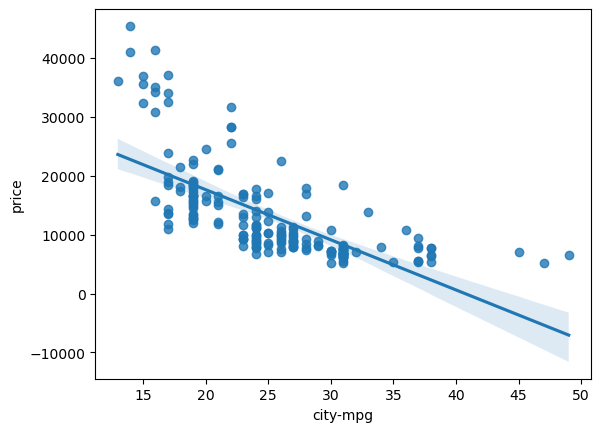

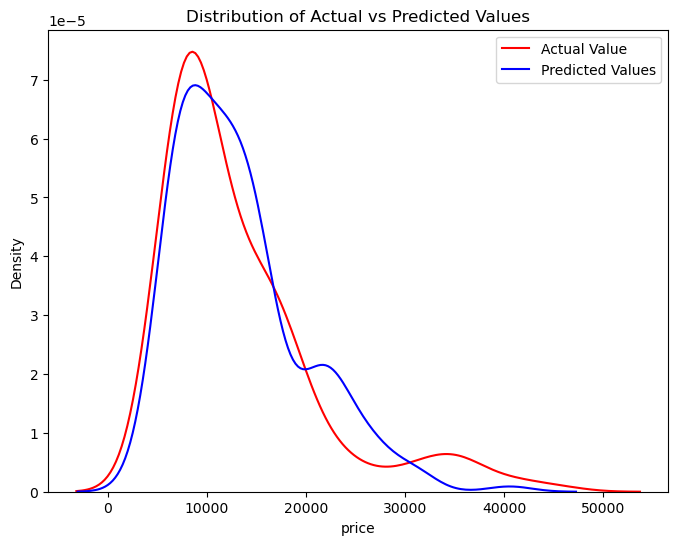

In [25]:
univariate_regression(data=df, independent_var='horsepower', dependent_var='price')

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     141.5
Date:                Fri, 16 Feb 2024   Prob (F-statistic):           1.37e-57
Time:                        16:34:19   Log-Likelihood:                -1624.2
No. Observations:                 170   AIC:                             3260.
Df Residuals:                     164   BIC:                             3279.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -2.712e+04   6056.574     

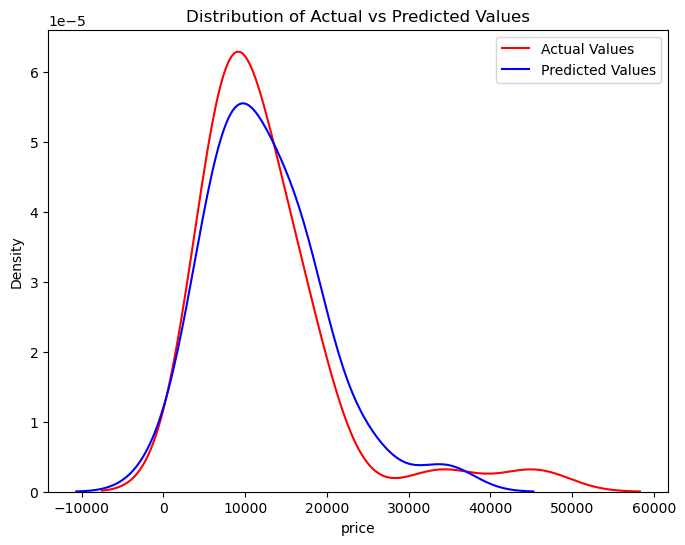

In [21]:
independent_vars = ['wheel-base','horsepower','highway-L/100km', 'aspiration-std', 'fuel-type-gas']
multivariate_regression(data=df,independent_vars=independent_vars,dependent_var='price')